# DS219 Assignment 5
**Author：** Selina Zhang  
**Data Set：** Cleveland Heart Disease 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
sns.set()

In [4]:
import pandas as pd

#official columns name from website
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(
    "/Users/selinaz/Documents/BU/heart+disease/processed.cleveland.data",
    names=columns
)


df.to_csv("processed_cleveland.csv", index=False)
print("转换完成，已保存为 processed_cleveland.csv")

转换完成，已保存为 processed_cleveland.csv


In [5]:
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [9]:
print(df.isin(["?"]).sum())
df = df.replace("?", np.nan)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Distribution of target

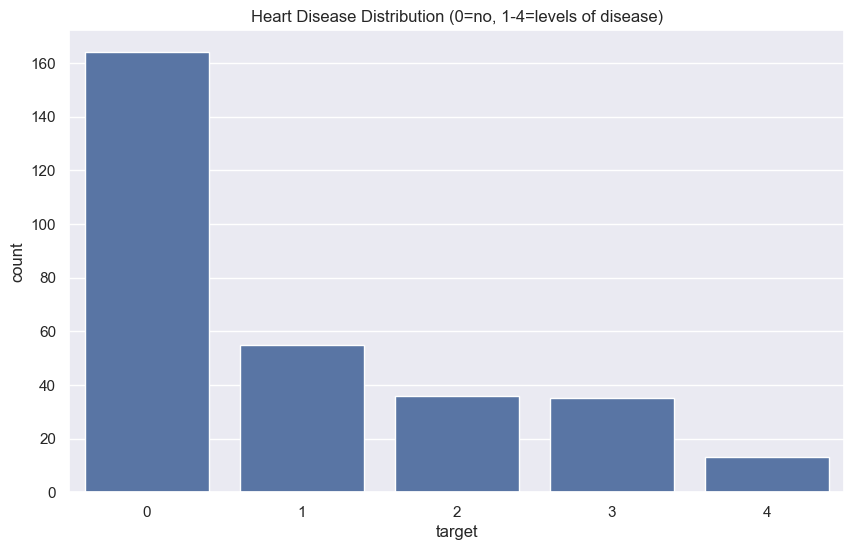

In [10]:
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution (0=no, 1-4=levels of disease)")
plt.show()

# Histogram of age

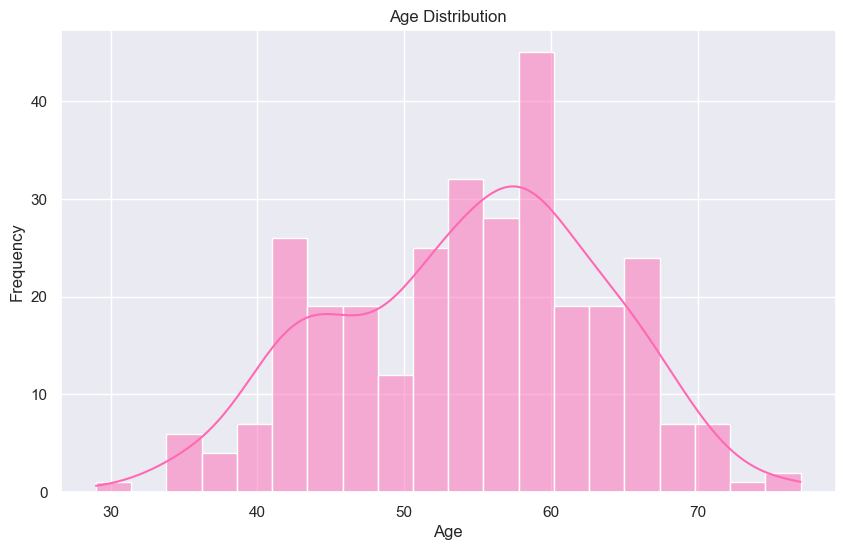

In [12]:
sns.histplot(df["age"], bins=20, kde=True, color="#ff69b4")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender vs Heart Disease

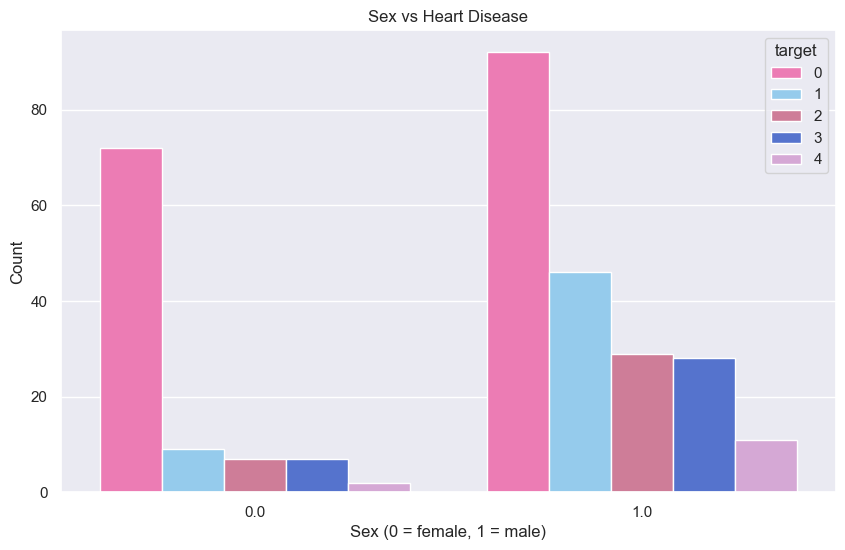

In [14]:
sns.countplot(x="sex", hue="target", data=df, palette=["#ff69b4", "#87cefa", "#db7093", "#4169e1", "#dda0dd"])
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = female, 1 = male)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap

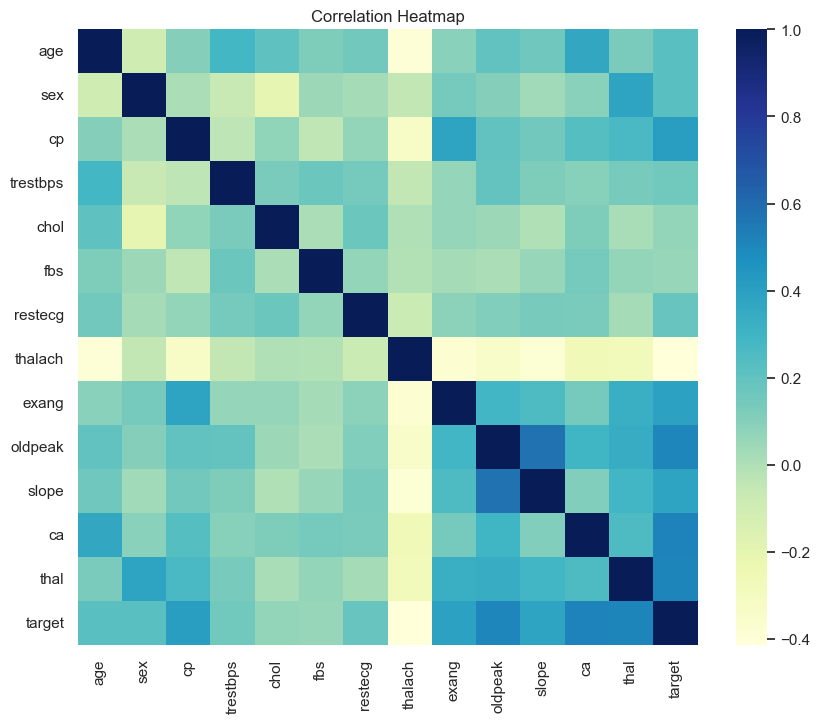

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Hypothesis 1
Heart disease is more common in males than females.
- Test chosen: Chi-square test of independence
- Why it’s appropriate: Both sex (male/female) and target (heart disease/no disease) are categorical variables, so the chi-square test checks if they are independent.
- Result: Becasue p-value<0.05, means there is a significant association between gender and heart disease.

In [19]:
from scipy.stats import chi2_contingency, ttest_ind

# Group by sex (0 = female, 1 = male) and check mean target values
df.groupby('sex')['target'].mean()

# Perform Chi-square test
contingency_table = pd.crosstab(df['sex'], df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test p-value:", p)

Chi-square test p-value: 0.00010410590365461076


# Hypothesis 2
Cholesterol levels are higher in patients with heart disease.
- Test chosen: Independent samples t-test
- Why it’s appropriate: chol is a numerical variable, and target splits patients into two groups. The t-test compares mean cholesterol between groups.
- Result: Because T-test p-value<0.05, so it shows that patients with heart disease are significantly older.

In [20]:
# Split into two groups
disease_chol = df[df['target'] == 1]['chol']
no_disease_chol = df[df['target'] == 0]['chol']

# Perform t-test
t_stat, p = ttest_ind(disease_chol, no_disease_chol)
print("T-test p-value:", p)

T-test p-value: 0.4127982487228694
